In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [16]:
crypto_data_df=pd.read_csv('crypto_data.csv')
crypto_data_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
tradingcrypto_df=crypto_data_df.loc[crypto_data_df['IsTrading']==True]
tradingcrypto_df= tradingcrypto_df.drop('IsTrading',1)
tradingcrypto_df=tradingcrypto_df.dropna()
tradingcrypto_df

C:\Users\ELENAC~1\AppData\Local\Temp/ipykernel_4112/2423070929.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tradingcrypto_df= tradingcrypto_df.drop('IsTrading',1)


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
tradingcrypto_df.isna().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [11]:
tradingcrypto_df=crypto_data_df.loc[crypto_data_df['TotalCoinsMined']>0]
tradingcrypto_df=tradingcrypto_df.drop('CoinName',1)
tradingcrypto_df=tradingcrypto_df.drop('Unnamed: 0',1)
tradingcrypto_df.dtypes

C:\Users\ELENAC~1\AppData\Local\Temp/ipykernel_4112/968602972.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tradingcrypto_df=tradingcrypto_df.drop('CoinName',1)
C:\Users\ELENAC~1\AppData\Local\Temp/ipykernel_4112/968602972.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tradingcrypto_df=tradingcrypto_df.drop('Unnamed: 0',1)


Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [25]:
tradingcrypto_df=tradingcrypto_df.astype({'TotalCoinSupply':float})

In [26]:
cleancrypto_df=pd.get_dummies(tradingcrypto_df)
cleancrypto_df

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,True,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,True,1.283270e+05,1.000000e+06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crypto_standardized = scaler.fit_transform(cleancrypto_df)
crypto_standardized

array([[ 0.29083753, -0.11450078, -0.15072489, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.29083753, -0.09041991, -0.14255828, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.29083753,  0.55369883,  4.67185916, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [ 0.29083753, -0.11433426, -0.15040252, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.29083753, -0.11449785, -0.15070954, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-3.43834586, -0.11401032, -0.14918981, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [29]:
pca = PCA(n_components=.9)
crypto_pca=pca.fit_transform(crypto_standardized)
crypto_pca_pd=pd.DataFrame (crypto_pca)

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)
tsne_crypto=tsne.fit_transform(crypto_pca)
tsne_crypto_df=pd.DataFrame(tsne_crypto)
tsne_crypto_df

,0,1
0,-1.733029,-14.275795
1,-0.152278,-20.874804
2,-0.780884,-29.639494
3,-2.639109,33.867512
4,20.378138,8.932723
...,...,...
572,-3.544520,-20.017031
573,24.009745,-1.125670
574,14.989544,15.114267
575,-6.874603,9.318732


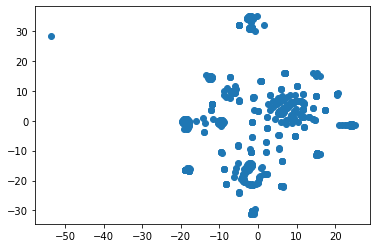

In [31]:
import matplotlib.pyplot as plt
plt.scatter(tsne_crypto_df[0], tsne_crypto_df[1])

In [32]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=5)
model.fit(tsne_crypto_df)

KMeans(n_clusters=3, random_state=5)

In [33]:
predictions= model.predict(tsne_crypto_df)
predictions

array([1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2,
       0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2,
       0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0,

In [34]:
tsne_crypto_df['group']=model.labels_

In [35]:
tsne_crypto_df

,0,1,group
0,-1.733029,-14.275795,1
1,-0.152278,-20.874804,1
2,-0.780884,-29.639494,1
3,-2.639109,33.867512,0
4,20.378138,8.932723,2
...,...,...,...
572,-3.544520,-20.017031,1
573,24.009745,-1.125670,2
574,14.989544,15.114267,2
575,-6.874603,9.318732,0


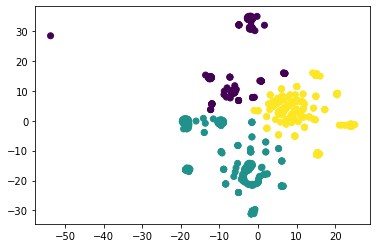

In [36]:
plt.scatter(tsne_crypto_df[0], tsne_crypto_df[1], c=tsne_crypto_df['group'])

C:\Users\Elena Church\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


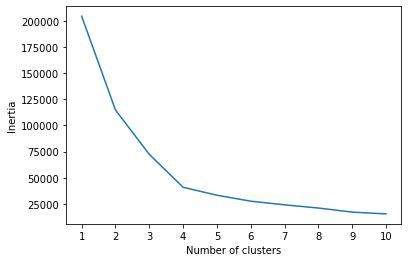

In [37]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_crypto_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=5)
model.fit(tsne_crypto_df)
predictions= model.predict(tsne_crypto_df)
tsne_crypto_df['group']=model.labels_

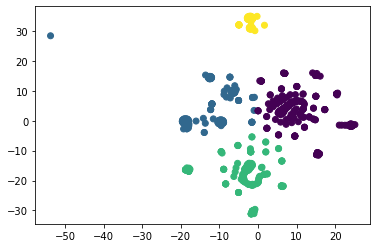

In [39]:
plt.scatter(tsne_crypto_df[0], tsne_crypto_df[1], c=tsne_crypto_df['group'])

we can say that the cryptocurrencies can be clustered into 4 differnt groups. I have run the model twice once just with 3 clusters and then a second time with 4 clusters. I choose 4 clusters for the second modle fit becuase this is where the K-elbow was according to the graph. I also feel using the K-means model is good for this data as the data is spherical cluster. 